Program that extracts the information about the position and velocity of atoms in each sites along with charge and charge velocity at those sites in each frames.


path="" refers to the path of the dump file from which data is to be extracted

frames=------ number of frames during openmd execution

atomNumber=----------- total number of atomic sites during program execution

In [2]:
# extract information from dump file.
import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
%matplotlib inline
from matplotlib import rcParams
import os

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/function")

import FDEAM as feam

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/")



#setting different parameteres
params = {
    'font.family':'serif',
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [5,5]
   }
rcParams.update(params)


In [1086]:
#==================================================================================================================
#path="/home/hbhattar/afs/Hemanta/metals/ImageCharge/Pt100ImageCharge/Simulation/ImageSlab.dump"; #the path of the file
#path="/home/hbhattar/afs/Hemanta/metals/ImageCharge/Pt100ImageCharge/Simulation/ImageSlabNFQ.dump"; 
path="/home/hbhattar/afs/Hemanta/metals/KTuning/Simulation/PtSlab111Z24K_11E_1.dump"; 
frames=100                  ;              #total frames in dump file
atomNumber=2000;         #total atoms in lattice


#====================================================================================================================


fileDump=open(path)  #dump file for info extraction
linesDump=fileDump.readlines()

processP="Wait"
processC="Wait"


#information storage matrix 
#posiiton and velocity storage
x=num.zeros((frames,atomNumber))
y=num.zeros((frames,atomNumber))
z=num.zeros((frames,atomNumber))
fx=num.zeros((frames,atomNumber))
fy=num.zeros((frames,atomNumber))
fz=num.zeros((frames,atomNumber))
vx=num.zeros((frames,atomNumber))
vy=num.zeros((frames,atomNumber))
vz=num.zeros((frames,atomNumber))


#charge and velocity storage matrix
c=num.zeros((frames,atomNumber))
cv=num.zeros((frames,atomNumber))
ey=num.zeros((frames,atomNumber))
ex=num.zeros((frames,atomNumber))
ez=num.zeros((frames,atomNumber))
#frame count initilization
fCount=0
index=0  #index for the atoms
for line in linesDump:
    linesSplit=str.split(line)
    length=len(linesSplit)
    
    if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
        processP="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
        processP="Wait"
        index=0
        continue;
        
    elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
        processC="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
        fCount=fCount+1
        index=0;
        processC="Wait"
        continue;
   
    elif(fCount>=frames):
        break;
        
    else:
        processP=processP;
        processC=processC;
        
        
    if (processP=="Start"):
        x[fCount][index]=float(linesSplit[2])
        y[fCount][index]=float(linesSplit[3])
        z[fCount][index]=float(linesSplit[4])
        vx[fCount][index]=float(linesSplit[5])
        vy[fCount][index]=float(linesSplit[6])
        vz[fCount][index]=float(linesSplit[7])
        #fx[fCount][index]=float(linesSplit[8])
        #fy[fCount][index]=float(linesSplit[9])
        #fz[fCount][index]=float(linesSplit[10])
        index=index+1
        
    if(processC=="Start"):
        c[fCount][index]=float(linesSplit[3])
        cv[fCount][index]=float(linesSplit[4])
        ez[fCount][index]=float(linesSplit[7])
        ey[fCount][index]=float(linesSplit[6])
        ex[fCount][index]=float(linesSplit[5])
        index=index+1
       

In [1087]:
#determine the layers
a=num.sort(list(set(z[0,0:atomNumber-2])))
layer=[]
for var in a:
    layer.append(num.where(z[0]==var))
    


In [1088]:
Ex=[]
Ey=[]
Ez=[]
charge=[]
framing=99
for items in range(a.size):
    Ex.append(sum(ex[framing][layer[items][0]])/float(layer[items][0].size))
    Ey.append(sum(ey[framing][layer[items][0]])/float(layer[items][0].size))
    Ez.append(sum(ez[framing][layer[items][0]])/float(layer[items][0].size))
    charge.append(sum(c[framing][layer[items][0]])/float(layer[items][0].size))
    
    
 

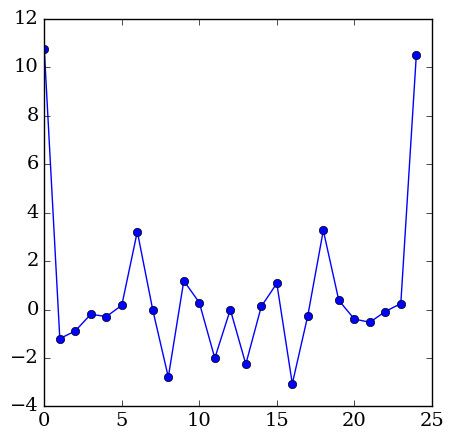

In [1089]:
lab.plot(Ez,'-o')

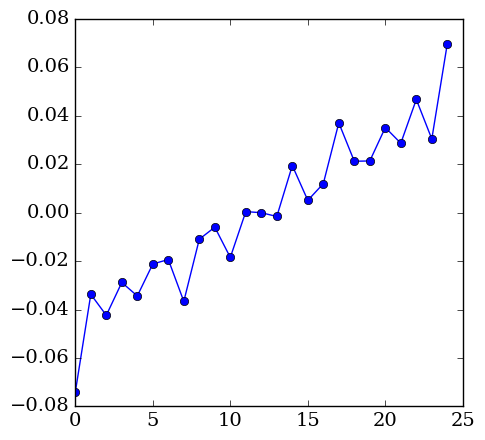

In [1090]:
lab.plot(charge,'-o')

In [1091]:
eavz=[]
eavx=[]
eavy=[]
chav=[]
zav=[]
begin=0
for counter in range(len(a)):
    eavz.append(num.sum(num.sum(ez[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    chav.append(num.sum(num.sum(c[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    eavx.append(num.sum(num.sum(ex[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    eavy.append(num.sum(num.sum(ey[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    zav.append(num.sum(num.sum(z[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))

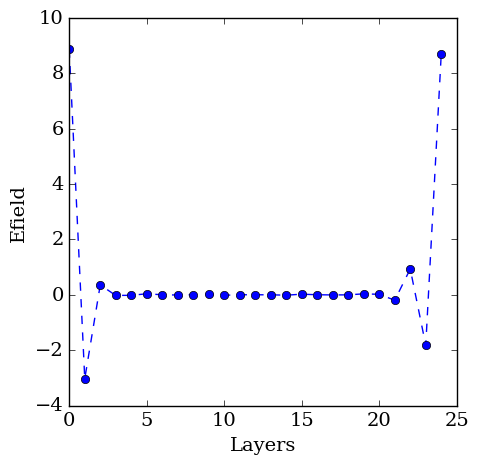

In [1092]:
lab.plot(eavz,'o--')
lab.xlabel("Layers")
lab.ylabel("Efield")
#lab.xticks(range(len(a)+1))
#lab.ylim([0,1])
#lab.savefig("../KTuning/Data/efield24K16E0.eps")
lab.show()

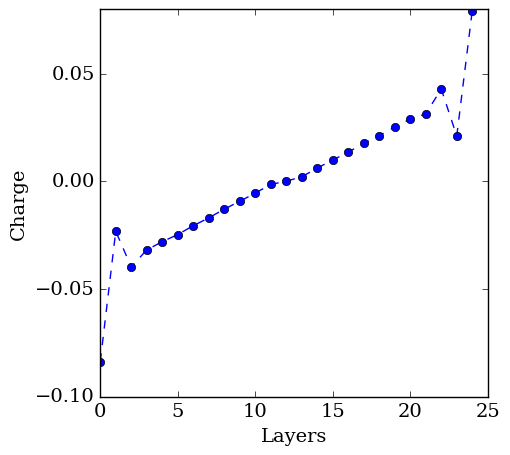

In [1093]:
lab.plot(chav,'o--')
lab.xlabel("Layers")
lab.ylabel("Charge")
#lab.xticks(range(len(a)+1))
lab.savefig("../KTuning/Data/charge24K16E0.eps")
lab.show()

In [1094]:
num.array(eavz)/23.0609/.2

array([  1.92248369e+00,  -6.58147502e-01,   7.71651290e-02,
        -4.97171788e-03,  -4.22724865e-03,   8.00176547e-03,
        -2.04987077e-05,  -1.81862096e-03,   6.37093200e-05,
         3.65238196e-03,  -3.87972538e-03,   3.83563236e-04,
         0.00000000e+00,  -1.30803985e-04,  -3.13124320e-03,
         4.73300379e-03,   2.71896813e-04,  -1.23478921e-03,
        -5.08811632e-04,   7.45975377e-03,   3.67483057e-03,
        -4.25465312e-02,   2.02279820e-01,  -3.95173805e-01,
         1.88721469e+00])

In [1095]:
chav[:3],chav[-3:],zav[:3],zav[-3:]

([-0.083827876926388892, -0.023248056261430557, -0.039852234155555562],
 [0.04281351494444445, 0.021015336103081945, 0.079226162426388899],
 [-26.007522947138888, -23.807615878077776, -21.544911407612503],
 [21.532806948838889, 23.790658416890277, 25.983896228377777])

In [1096]:
const=num.polyfit(zav[3:-3],chav[3:-3],1) #fit to y=const[0]*x+const[1]
print("Slope=%f\nIntercept=%f"%(const[0],const[1]))


Slope=0.001670
Intercept=0.000199


In [1097]:
dat=[]
for var in zav[:3]:
    dat.append(var)
for var in zav[-3:]:
    dat.append(var)
for var in chav[:3]:
    dat.append(var)
for var in chav[-3:]:
    dat.append(var)
dat.append(const[0])
print(dat)
    
    

[-26.007522947138888, -23.807615878077776, -21.544911407612503, 21.532806948838889, 23.790658416890277, 25.983896228377777, -0.083827876926388892, -0.023248056261430557, -0.039852234155555562, 0.04281351494444445, 0.021015336103081945, 0.079226162426388899, 0.0016704107724319352]


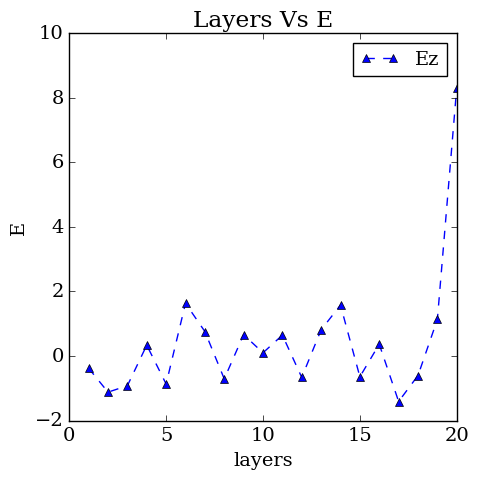

In [1085]:
#lab.plot(range(0,len(layer)),Ex,'o--',label="Ex")
#lab.plot(range(0,len(layer)),Ey,"^--",label="Ey")
lab.plot(range(1,len(layer)),Ez[1:],"^--",label="Ez")

lab.xlabel("layers")
lab.ylabel("E")
lab.title("Layers Vs E")
lab.legend(loc="upper right")

In [1059]:
c[:,1]


array([-0.05988958, -0.04361274, -0.03809966, -0.06719794, -0.07526602,
       -0.04887015, -0.04352766, -0.05927693, -0.05209261, -0.0400458 ,
       -0.05312691, -0.06089641, -0.04879575, -0.05041799, -0.06307632,
       -0.05601965, -0.04540074, -0.05329802, -0.05795927, -0.05079169,
       -0.05125907, -0.05280911, -0.04527222, -0.04952751, -0.06395326,
       -0.05979782, -0.05009416, -0.05906527, -0.05856361, -0.03664829,
       -0.03888729, -0.06596223, -0.06470755, -0.04426387, -0.05338927,
       -0.06639891, -0.04634236, -0.03528287, -0.05633804, -0.06054512,
       -0.04381433, -0.05448433, -0.07438616, -0.05740233, -0.0364336 ,
       -0.04965923, -0.05994978, -0.04647921, -0.04684194, -0.06255093,
       -0.05809234, -0.04495609, -0.05070201, -0.05913883, -0.05661166,
       -0.0568383 , -0.05555364, -0.04480075, -0.04445768, -0.0559125 ,
       -0.05405257, -0.04871783, -0.06117062, -0.06610462, -0.04896205,
       -0.04511055, -0.05711797, -0.04806527, -0.03575494, -0.05

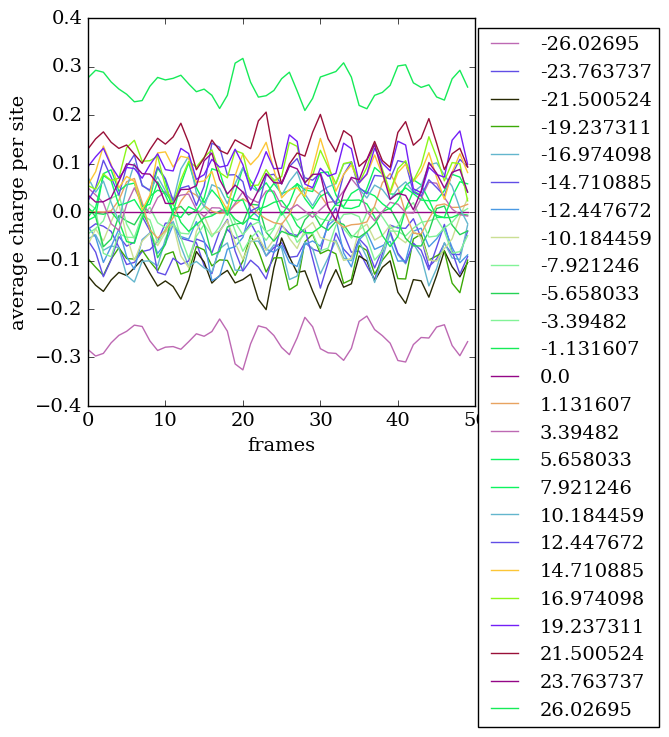

In [1018]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color
g=num.array([generate_color() for var in range(1000)])
colors=g[num.random.randint(len(a),size=len(a))]
         
fig = plt.figure(1)
ax = fig.add_subplot(111)

for counter in range(len(a)):
    lab.plot(num.sum(c[50:,layer[counter][0]],axis=1)/len(layer[counter][0]),colors[counter],label=a[counter])
    

handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
#lab.savefig(folderPath+"chargeLayersDaw_Ksmall.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()

In [411]:
chargeAvAtom=num.sum(c,axis=0)/100
ezAvAtom=num.sum(ez,axis=0)/100

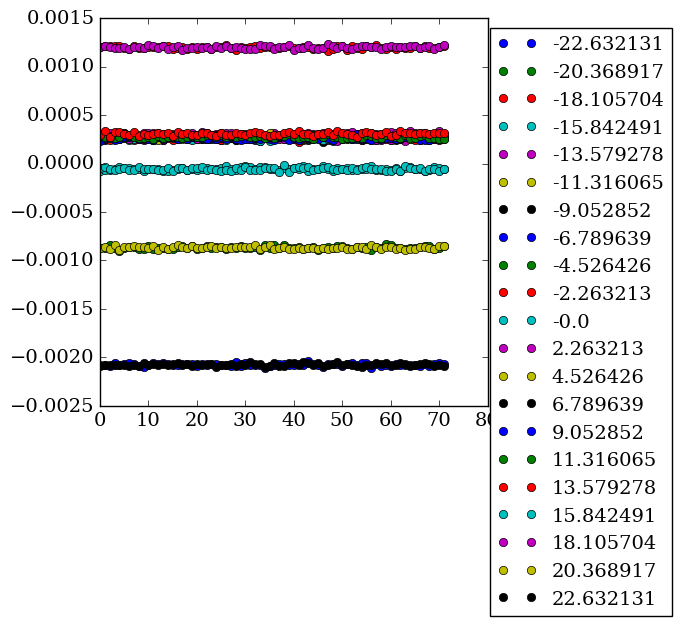

In [412]:
for counter in range(len(a)):
    lab.plot(chargeAvAtom[layer[counter][0]],'o',label=a[counter])
    handles, labels = ax.get_legend_handles_labels()
    lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")

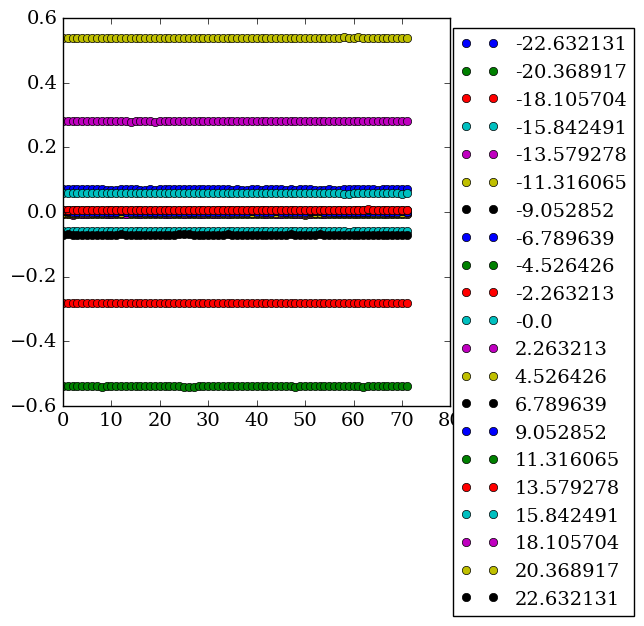

In [413]:
for counter in range(len(a)):
    lab.plot(ezAvAtom[layer[counter][0]],'o',label=a[counter])
    handles, labels = ax.get_legend_handles_labels()
    lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")

In [450]:
thickness=num.array([9,12,15,18,21,24])
atoms=num.array([648,864,1080,1296,1512,1728])
pol=num.array([9.46045e-28,2.35626e-27,4.45403e-27,7.65662e-27 ,1.18932e-26,1.76355e-26 ])

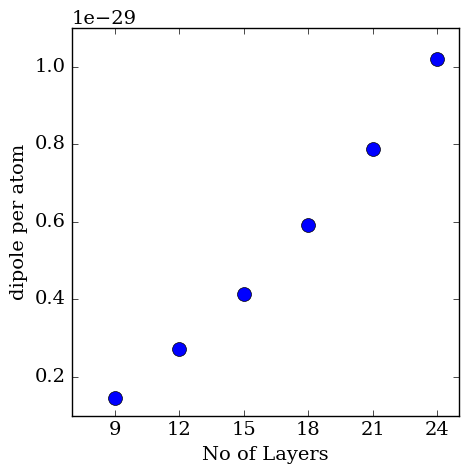

In [463]:
lab.plot(thickness,pol/atoms,'o',markersize=10)
lab.xticks(thickness)
lab.xlim([7,25])
lab.xlabel("No of Layers")
lab.ylabel("dipole per atom")
lab.savefig("../KTuning/Data/DipoleVThickness.eps")
lab.show()

In [736]:
-8.9943074801144451+6.7973288325172225,6.7964590375137508-8.9893895961070829

(-2.1969786475972226, -2.192930558593332)

In [725]:
-12.406088228372221+10.205045504168057,10.201435680820834-12.396608227843053

(-2.2010427242041644, -2.195172547022219)

In [2]:
import os

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/function")

import FDEAM as feam

os.chdir("/home/hbhattar/afs/Hemanta/metals/pythonScripts/")


In [22]:
KET=[[k,e,t] for k in range(10,27,2) for e in [0.1,0.2,0.3] for t in range(9,41,3)]
fileName=[]
for info in [[10,1,9]]:
    fileName.append("PtSlab111Z"+str(info[2])+"K_"+str(info[0])+"E_"+str(info[1])+".dump")
nMol={'9':648,'12':864,'15':1080,'18':1296,'21':1512,'24':1728,'27':1944,'30':2160,'33':2376,'36':2592,'39':2808}

In [23]:
frames=100
for info in KET:
    file="PtSlab111Z"+str(info[2])+"K_"+str(info[0])+"E_"+str(info[1])+".dump"
    try:
        rawData=feam.DumpExtractor("../KTuning/Simulation/"+file,100,nMol[str(info[2])],0)
        [vx,vy,vz]=rawData["velocity"]
        [x,y,z]=rawData["position"]
        [c,w]=rawData["chargeQV"]
        [ex,ey,ez]=rawData["electricField"]
        [layer,a]=feam.Layers(z,atoms)
    except:
        print("Error in reading "+"../KTuning/Simulation/"+file)
        continue;
    
    eavz=[]
    eavx=[]
    eavy=[]
    chav=[]
    zav=[]
    begin=0
    for counter in range(len(a)):
        eavz.append(num.sum(num.sum(ez[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        chav.append(num.sum(num.sum(c[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavx.append(num.sum(num.sum(ex[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavy.append(num.sum(num.sum(ey[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        zav.append(num.sum(num.sum(z[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    
    const=num.polyfit(zav[3:-3],chav[3:-3],1)
    dat=[]
    print("Writing::: K:%f  E:%f  T:%f"%(info[0],info[1],info[2]))
    fileData=open("../KTuning/Results/ZSlopeResultK_"+str(info[0])+"E_"+str(info[1])+".dat","a+")
    fileData.write(str(info[2]))
    for var in zav[:3]:
        fileData.write("\t")
        fileData.write(str(var))
    for var in zav[-3:]:
        fileData.write("\t")
        fileData.write(str(var))
    for var in chav[:3]:
        fileData.write("\t")
        fileData.write(str(var))
    for var in chav[-3:]:
        fileData.write("\t")
        fileData.write(str(var))
    fileData.write("\t")
    fileData.write(str(const[0]))
    fileData.write("\n")
    fileData.close()
    

Writing::: K:10.000000  E:0.100000  T:9.000000
Writing::: K:10.000000  E:0.100000  T:12.000000
Writing::: K:10.000000  E:0.100000  T:15.000000
Writing::: K:10.000000  E:0.100000  T:18.000000
Writing::: K:10.000000  E:0.100000  T:21.000000
Writing::: K:10.000000  E:0.100000  T:24.000000
Writing::: K:10.000000  E:0.100000  T:27.000000
Writing::: K:10.000000  E:0.100000  T:30.000000
Writing::: K:10.000000  E:0.100000  T:33.000000
Writing::: K:10.000000  E:0.100000  T:36.000000
Writing::: K:10.000000  E:0.100000  T:39.000000
Writing::: K:10.000000  E:0.200000  T:9.000000
Writing::: K:10.000000  E:0.200000  T:12.000000
Writing::: K:10.000000  E:0.200000  T:15.000000
Writing::: K:10.000000  E:0.200000  T:18.000000
Writing::: K:10.000000  E:0.200000  T:21.000000
Writing::: K:10.000000  E:0.200000  T:24.000000
Writing::: K:10.000000  E:0.200000  T:27.000000
Writing::: K:10.000000  E:0.200000  T:30.000000
Writing::: K:10.000000  E:0.200000  T:33.000000
Writing::: K:10.000000  E:0.200000  T:36.0

Writing::: K:20.000000  E:0.100000  T:30.000000
Writing::: K:20.000000  E:0.100000  T:33.000000
Writing::: K:20.000000  E:0.100000  T:36.000000
Writing::: K:20.000000  E:0.100000  T:39.000000
Writing::: K:20.000000  E:0.200000  T:9.000000
Writing::: K:20.000000  E:0.200000  T:12.000000
Writing::: K:20.000000  E:0.200000  T:15.000000
Writing::: K:20.000000  E:0.200000  T:18.000000
Writing::: K:20.000000  E:0.200000  T:21.000000
Writing::: K:20.000000  E:0.200000  T:24.000000
Writing::: K:20.000000  E:0.200000  T:27.000000
Writing::: K:20.000000  E:0.200000  T:30.000000
Writing::: K:20.000000  E:0.200000  T:33.000000
Writing::: K:20.000000  E:0.200000  T:36.000000
Writing::: K:20.000000  E:0.200000  T:39.000000
Writing::: K:20.000000  E:0.300000  T:9.000000
Writing::: K:20.000000  E:0.300000  T:12.000000
Writing::: K:20.000000  E:0.300000  T:15.000000
Writing::: K:20.000000  E:0.300000  T:18.000000
Writing::: K:20.000000  E:0.300000  T:21.000000
Writing::: K:20.000000  E:0.300000  T:24.0

In [1168]:
rawData.keys()

dict_keys(['velocity', 'platesEQV', 'position', 'electricField', 'chargeQV'])

In [1172]:
eavz

[3.4557340767500007,
 -1.7919567020291669,
 0.051342493031180603,
 -0.021511312261659671,
 -0.0014367893242385934,
 -0.2127521193757918,
 0.63720511476335284,
 -0.5444020663594028,
 3.4226580863083331]

In [1153]:
a==rawData["velocity"][0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [ ]:
KET=[[k,e,t] for k in range(10,25) for e in [3] for t in [9,12,15,18,21,24,27,30,33,36,39]]
frames=100
nMol={'9':648,'12':864,'15':1080,'18':1296,'21':1512,'24':1728,'27':1944,'30':2160,'33':2376,'36':2592,'39':2808}

for info in KET:
    file="PtSlab111Z24"+"K_"+str(info[0])+"E_"+str(info[1])+".dump"
    try:
        rawData=feam.DumpExtractor("../KTuning/Simulation/"+file,frames,nMol[str(info[2])],0)
        [vx,vy,vz]=rawData["velocity"]
        [x,y,z]=rawData["position"]
        [c,w]=rawData["chargeQV"]
        [ex,ey,ez]=rawData["electricField"]
        [layer,a]=feam.Layers(z,2000)
    except:
        print("Error in reading "+"../KTuning/Simulation/"+file)
        continue;
    
    eavz=[]
    eavx=[]
    eavy=[]
    chav=[]
    zav=[]
    begin=0
    for counter in range(len(a)):
        eavz.append(num.sum(num.sum(ez[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        chav.append(num.sum(num.sum(c[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavx.append(num.sum(num.sum(ex[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavy.append(num.sum(num.sum(ey[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        zav.append(num.sum(num.sum(z[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    
    const=num.polyfit(zav[3:-3],chav[3:-3],1)
    dat=[]
    print("Writing::: K:%f  E:%f"%(info[0],info[1]))
    fileData=open("../KTuning/Results/SlopeK_"+str(info[0])+".dat","a+")
    fileData.write(str(info[1]))
    fileData.write("\t")
    fileData.write(str(const[0]))
    fileData.write("\n")
    fileData.close()
    

Writing::: K:10.000000  E:1.000000
Writing::: K:10.000000  E:1.000000
Writing::: K:10.000000  E:1.000000
Writing::: K:10.000000  E:1.000000
Writing::: K:10.000000  E:1.000000
Writing::: K:10.000000  E:1.000000
Writing::: K:11.000000  E:1.000000
Writing::: K:11.000000  E:1.000000
Writing::: K:11.000000  E:1.000000
Writing::: K:11.000000  E:1.000000
Writing::: K:11.000000  E:1.000000
Writing::: K:11.000000  E:1.000000
Writing::: K:12.000000  E:1.000000
Writing::: K:12.000000  E:1.000000
Writing::: K:12.000000  E:1.000000
Writing::: K:12.000000  E:1.000000
Writing::: K:12.000000  E:1.000000
Writing::: K:12.000000  E:1.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:14.000000  E:1.000000
Writing::: K:14.000000  E:1.000000
Writing::: K:14.000000  E:1.000000
Writing::: K:14.000000  E:1.000000
Writing::: K:14.0000

In [ ]:
KET=[[k,e] for k in range(10,39) for e in [1,3,4,5,6,7,8,9]]
nMol={'9':648,'12':864,'15':1080,'18':1296,'21':1512,'24':1728,'27':1944,'30':2160,'33':2376,'36':2592,'39':2808}
frames=100

for info in KET:
    file="PtSlab111Z24"+"K_"+str(info[0])+"E_"+str(info[1])+".dump"
    try:
        rawData=feam.DumpExtractor("../KTuning/Simulation/"+file,frames,nMol[str(info[2])],0)
        [vx,vy,vz]=rawData["velocity"]
        [x,y,z]=rawData["position"]
        [c,w]=rawData["chargeQV"]
        [ex,ey,ez]=rawData["electricField"]
        [layer,a]=feam.Layers(z,2000)
    except:
        print("Error in reading "+"../KTuning/Simulation/"+file)
        continue
    
    eavz=[]
    eavx=[]
    eavy=[]
    chav=[]
    zav=[]
    begin=0
    for counter in range(len(a)):
        eavz.append(num.sum(num.sum(ez[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        chav.append(num.sum(num.sum(c[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavx.append(num.sum(num.sum(ex[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavy.append(num.sum(num.sum(ey[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        zav.append(num.sum(num.sum(z[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    
    const=num.polyfit(zav[3:-3],chav[3:-3],1)
    dat=[]
    print("Writing::: K:%f  E:%f"%(info[0],info[1]))
    fileData=open("../KTuning/Results/SlopeE_"+str(info[1])+".dat","a+")
    fileData.write(str(info[0]))
    fileData.write("\t")
    fileData.write(str(const[0]))
    fileData.write("\n")
    fileData.close()
    

Writing::: K:10.000000  E:1.000000
Writing::: K:10.000000  E:3.000000
Writing::: K:10.000000  E:4.000000
Writing::: K:10.000000  E:5.000000
Writing::: K:10.000000  E:6.000000
Writing::: K:10.000000  E:7.000000
Writing::: K:10.000000  E:8.000000
Error in reading ../KTuning/Simulation/PtSlab111Z24K_10E_9.dump
Writing::: K:11.000000  E:1.000000
Writing::: K:11.000000  E:3.000000
Writing::: K:11.000000  E:4.000000
Writing::: K:11.000000  E:5.000000
Writing::: K:11.000000  E:6.000000
Writing::: K:11.000000  E:7.000000
Writing::: K:11.000000  E:8.000000
Error in reading ../KTuning/Simulation/PtSlab111Z24K_11E_9.dump
Writing::: K:12.000000  E:1.000000
Writing::: K:12.000000  E:3.000000
Writing::: K:12.000000  E:4.000000
Writing::: K:12.000000  E:5.000000
Writing::: K:12.000000  E:6.000000
Writing::: K:12.000000  E:7.000000
Writing::: K:12.000000  E:8.000000
Writing::: K:12.000000  E:9.000000
Writing::: K:13.000000  E:1.000000
Writing::: K:13.000000  E:3.000000
Writing::: K:13.000000  E:4.0000

In [13]:
help(feam.Layers)

Help on function Layers in module FDEAM:

Layers(ZPosition, atomNumber)



In [6]:
help(feam.DumpExtractor)

Help on function DumpExtractor in module FDEAM:

DumpExtractor(filename, frames, atomNumber, atomPlate)
    infoDict=DumpExtractor(filename,frames,atomNumber,atomPlate)
    
    
    Function that extracts the information from the .dump file created by openmd
        
        
        Inputs:
       
       
       filename:
       
                   Path of the dump file from which the information is to be extracted
                   
        frame:
        
                    Total number of frames in the dump file
                    
        atomNumber:
            
                    Totla number of atoms in the slab or crystal
                    
        atomPlate:
        
                    Total number of atoms in the capacitor plates
    
    
    
        Outputs:
     
     infoDict:
     
             Dictonary containing position, velocity, chargeQV, electricField, plateEQV.
             Postion is a list of [x,y,z] and each x,y,z are array of x[frames][sites]
     

=========K:18=====E:0.100000=======T:9======

M_qz: 0.000157
M_q: 0.000356
M_z: 2.266728
M_q/M_z: 0.000157




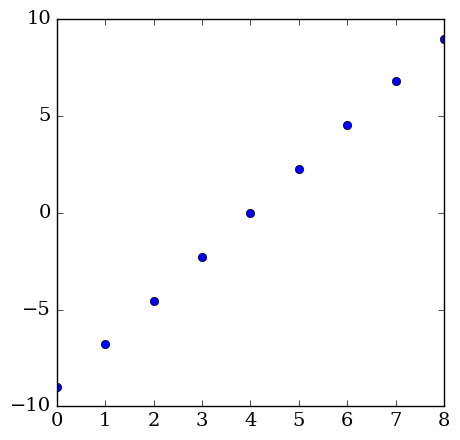

=========K:18=====E:0.100000=======T:12======

M_qz: 0.000152
M_q: 0.000344
M_z: 2.262765
M_q/M_z: 0.000152




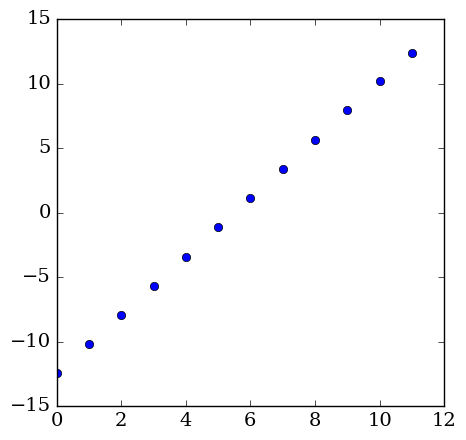

=========K:18=====E:0.100000=======T:15======

M_qz: 0.000152
M_q: 0.000345
M_z: 2.263876
M_q/M_z: 0.000152




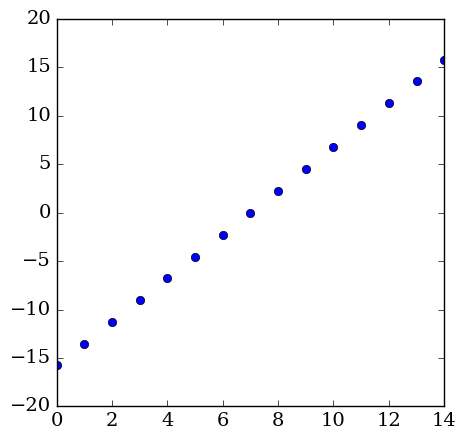

=========K:18=====E:0.100000=======T:18======

M_qz: 0.000152
M_q: 0.000343
M_z: 2.263739
M_q/M_z: 0.000152




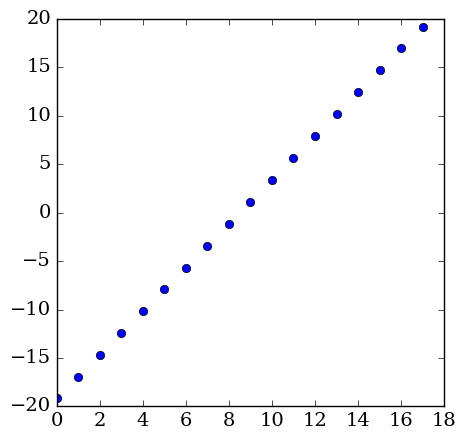

=========K:18=====E:0.100000=======T:21======

M_qz: 0.000151
M_q: 0.000342
M_z: 2.263649
M_q/M_z: 0.000151




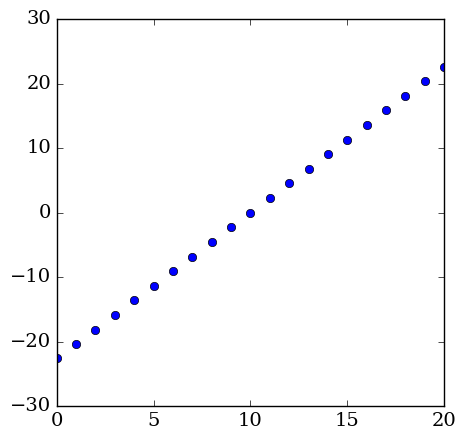

=========K:18=====E:0.100000=======T:24======

M_qz: 0.000151
M_q: 0.000341
M_z: 2.263775
M_q/M_z: 0.000151




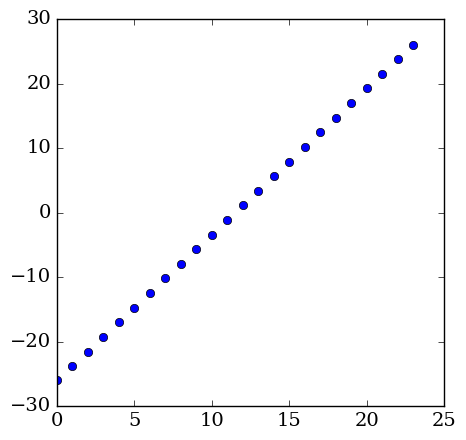

=========K:18=====E:0.100000=======T:27======

M_qz: 0.000150
M_q: 0.000341
M_z: 2.263811
M_q/M_z: 0.000150




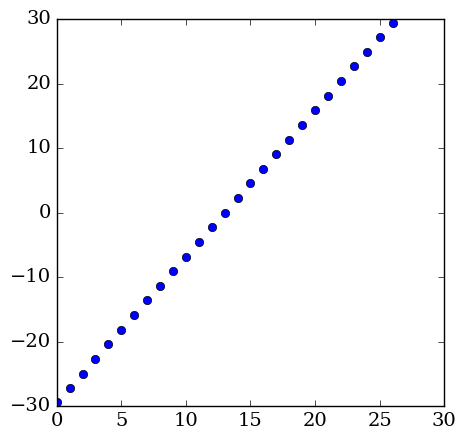

=========K:18=====E:0.100000=======T:30======

M_qz: 0.000151
M_q: 0.000341
M_z: 2.263783
M_q/M_z: 0.000151




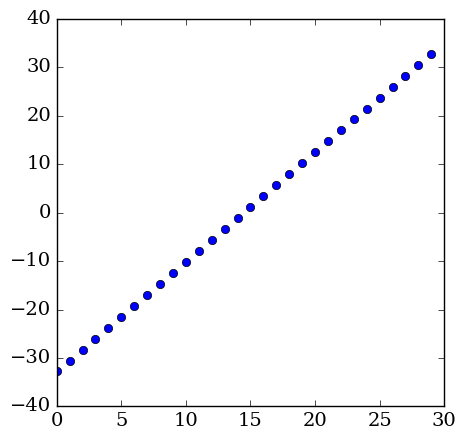

=========K:18=====E:0.100000=======T:33======

M_qz: 0.000151
M_q: 0.000341
M_z: 2.263735
M_q/M_z: 0.000151




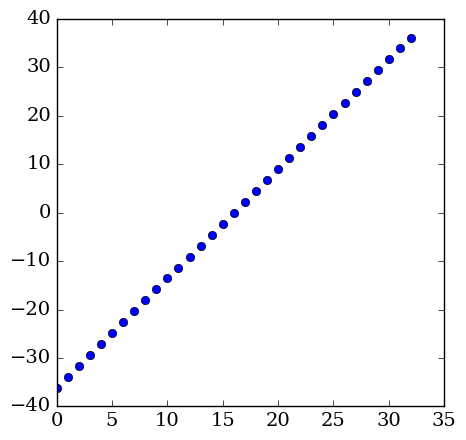

=========K:18=====E:0.100000=======T:36======

M_qz: 0.000151
M_q: 0.000341
M_z: 2.263683
M_q/M_z: 0.000151




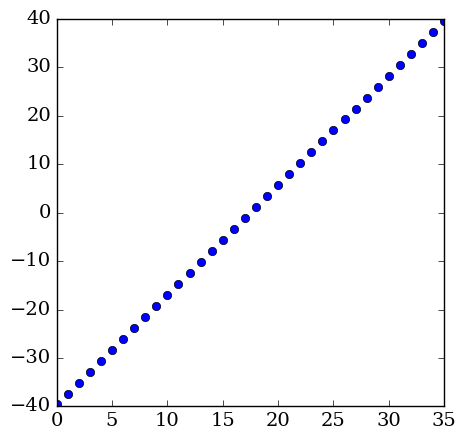

In [71]:
KET=[[k,e,t] for k in [18] for e in [0.1] for t in [9,12,15,18,21,24,27,30,33,36]]
frames=100
nMol={'9':648,'12':864,'15':1080,'18':1296,'21':1512,'24':1728,'27':1944,'30':2160,'33':2376,'36':2592,'39':2808}
for info in KET:
    file="PtSlab111Z"+str(info[2])+"K_"+str(info[0])+"E_"+str(info[1])+".dump"
    try:
        rawData=feam.DumpExtractor("../KTuning/Simulation/"+file,frames,nMol[str(info[2])],0)
        [vx,vy,vz]=rawData["velocity"]
        [x,y,z]=rawData["position"]
        [c,w]=rawData["chargeQV"]
        [ex,ey,ez]=rawData["electricField"]
        [layer,a]=feam.Layers(z,4500)
    except:
        print("Error in reading "+"../KTuning/Simulation/"+file)
        continue
    
    eavz=[]
    eavx=[]
    eavy=[]
    chav=[]
    zav=[]
    begin=0
    for counter in range(len(a)):
        eavz.append(num.sum(num.sum(ez[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        chav.append(num.sum(num.sum(c[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavx.append(num.sum(num.sum(ex[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavy.append(num.sum(num.sum(ey[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        zav.append(num.sum(num.sum(z[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    const0=num.polyfit(zav[3:-3],chav[3:-3],1)
    const1=num.polyfit(range(len(chav[3:-3])),chav[3:-3],1)
    const2=num.polyfit(range(len(zav[3:-3])),zav[3:-3],1)
    print("=========K:%d=====E:%f=======T:%d======\n"%(info[0],info[1],info[2]))
    print("M_qz: %f\nM_q: %f\nM_z: %f\nM_q/M_z: %f\n\n"%(const0[0],const1[0],const2[0],const1[0]/const2[0]))
    lab.plot(zav,'o')
    #lab.xlim([-1,22])
    lab.show()
    

In [67]:
diffz=[]
for var in range(len(zav)-1):
    diffz.append(zav[var+1]-zav[var])
    
diffc=[]
for var in range(len(zav)-1):
    diffc.append(chav[var+1]-chav[var])

Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.00000001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.0000001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.000001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.00001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.0002.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.00002.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.00005.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_1E_0.0005.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_5E_0.00000001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_5E_0.0000001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_5E_0.000001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_5E_0.00001.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_5E_0.0002.dump
Error in reading ../KTuning/Simulation/PtSlab111Z36K_5E_0.00002.dump
Error in reading ../KTuni

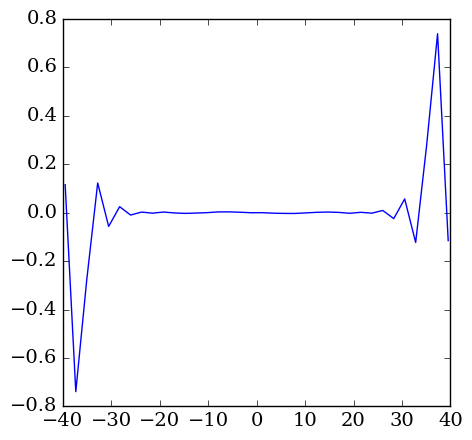

7.55514497258e-39 [  7.54737877e-39   1.04473698e-34]


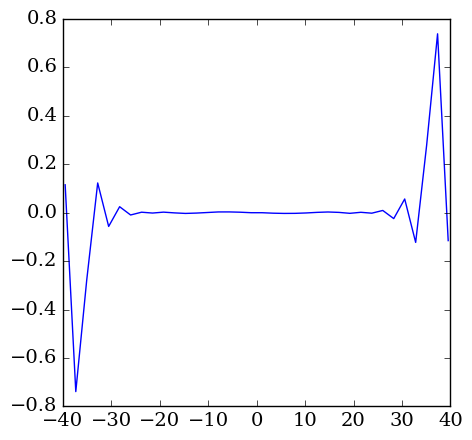

1.12915622781e-38 [  1.12801071e-38   1.04490111e-34]


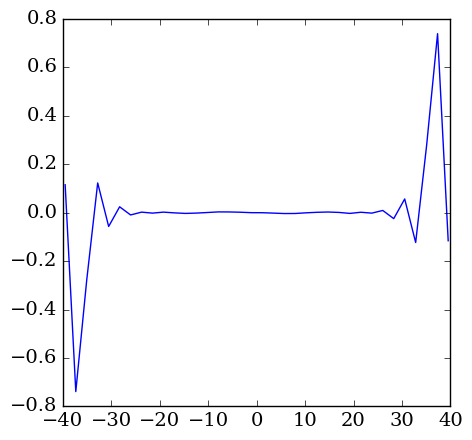

1.30687119795e-38 [  1.30555039e-38   1.04553537e-34]


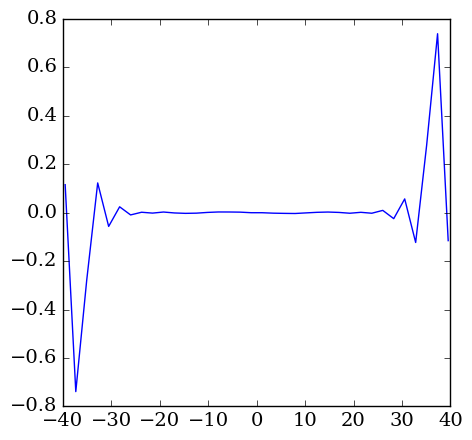

3.03946431034e-40 [  3.04411204e-40   1.04554043e-34]


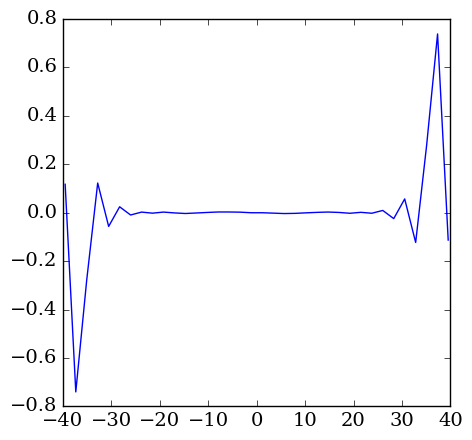

2.10092538247e-37 [  2.09896932e-37   1.04483234e-34]


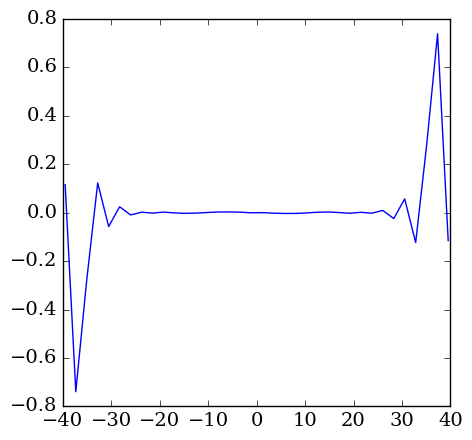

1.63968126862e-38 [  1.63814497e-38   1.04488017e-34]


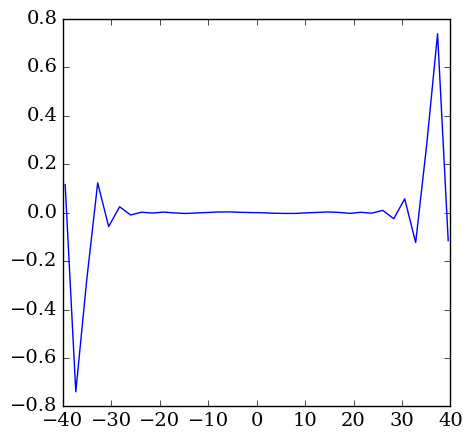

5.02210306121e-38 [  5.01741757e-38   1.04529892e-34]


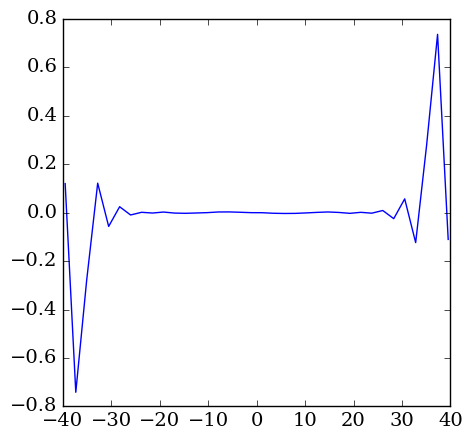

5.05549799499e-37 [  5.05079979e-37   1.04548165e-34]


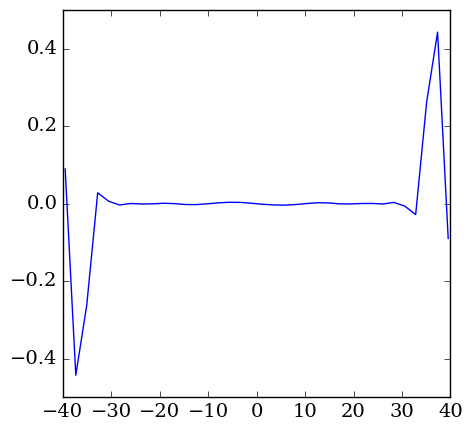

7.95783205567e-40 [  7.95269914e-40   7.97262943e-35]


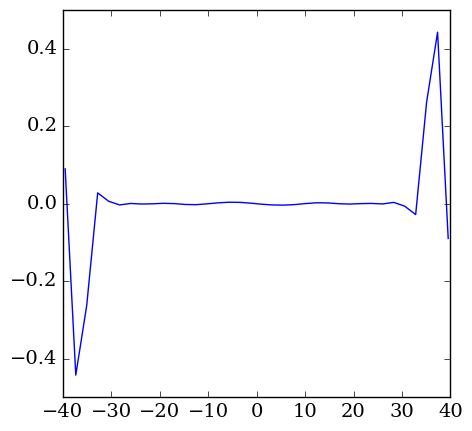

-1.95722967423e-39 [ -1.95524885e-39   7.96920115e-35]


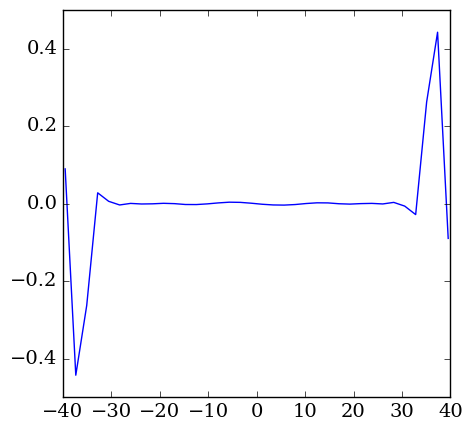

-2.52404399158e-40 [ -2.52435194e-40   7.96572162e-35]


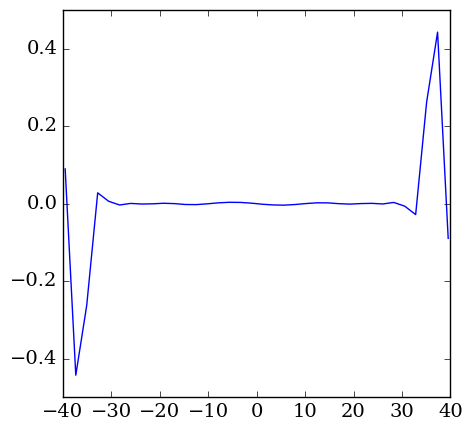

6.94399796287e-39 [  6.93736259e-39   7.97399154e-35]


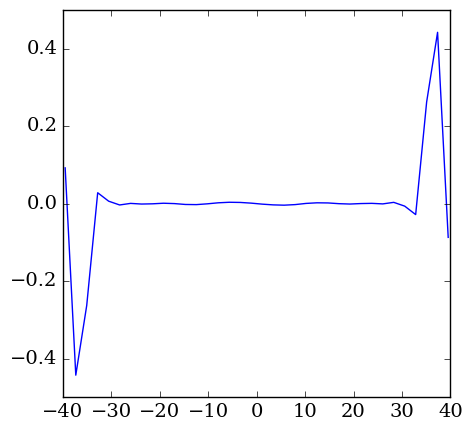

1.67536361207e-37 [  1.67380198e-37   7.96946540e-35]


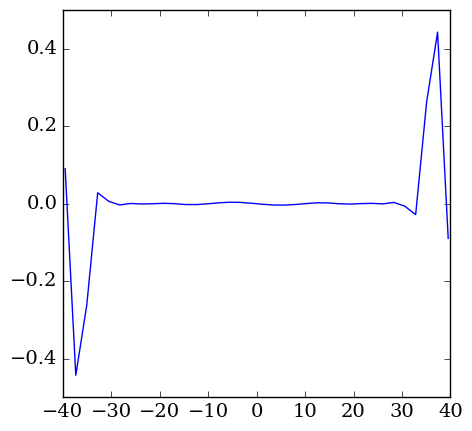

2.27093081672e-38 [  2.26879989e-38   7.96795808e-35]


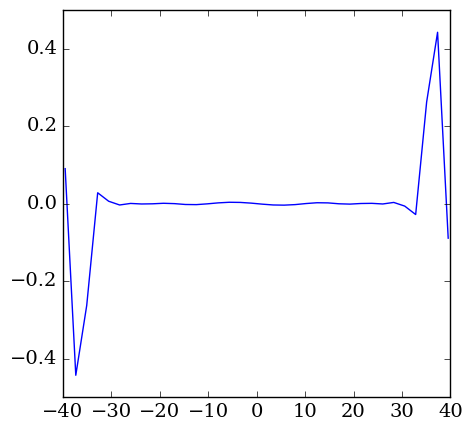

4.60080673713e-38 [  4.59648495e-38   7.97210914e-35]


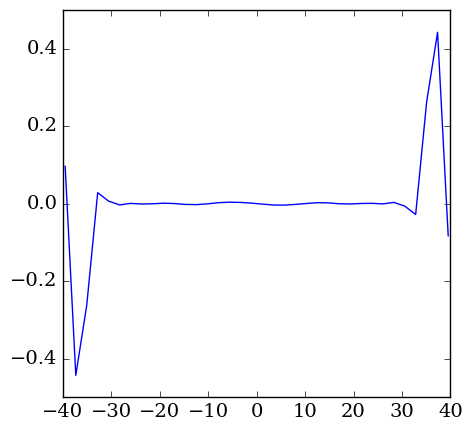

4.24581094302e-37 [  4.24185868e-37   7.97344110e-35]


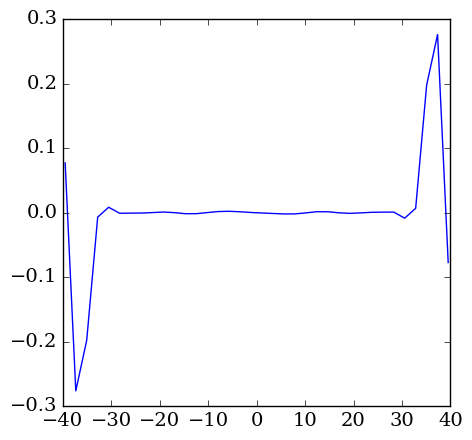

-7.98701974138e-40 [ -7.98141173e-40   5.75793800e-35]


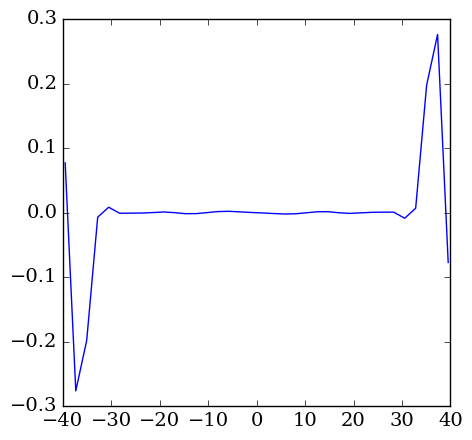

-2.59100884812e-39 [ -2.58853526e-39   5.75663940e-35]


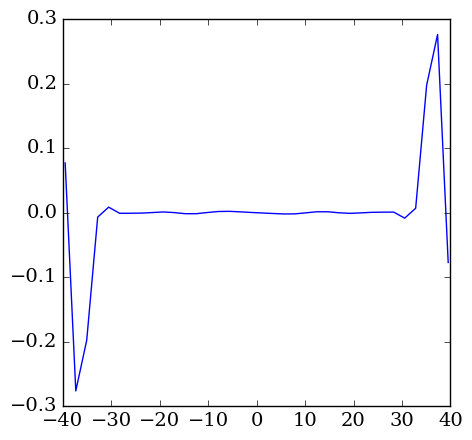

-2.78393485519e-39 [ -2.78134237e-39   5.75560946e-35]


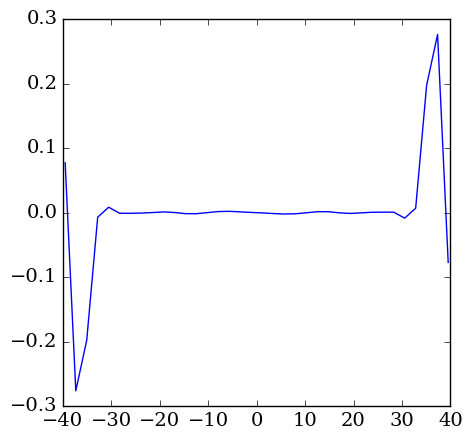

3.29356017217e-39 [  3.29021328e-39   5.75498863e-35]


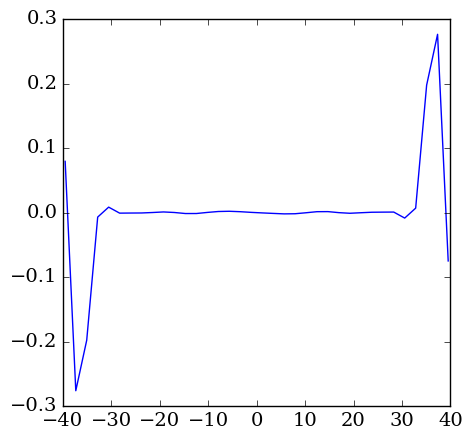

1.26289728457e-37 [  1.26172109e-37   5.75564326e-35]


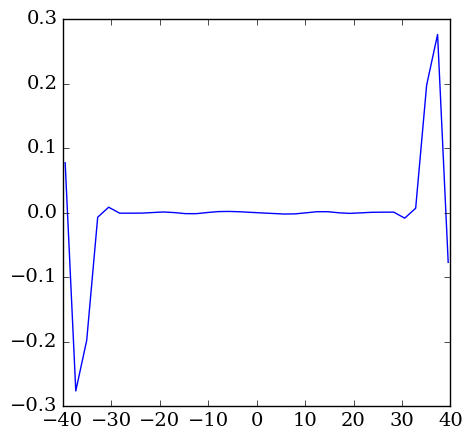

1.32034071933e-38 [  1.31909473e-38   5.75763708e-35]


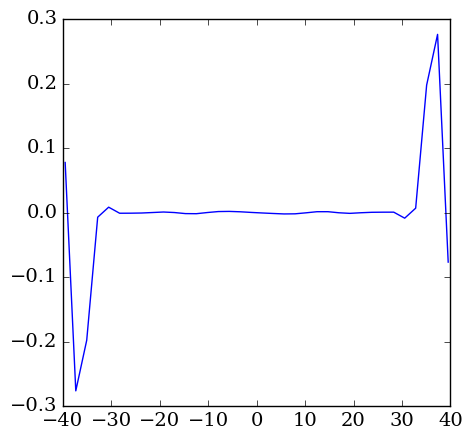

3.48368796453e-38 [  3.48043073e-38   5.76011822e-35]


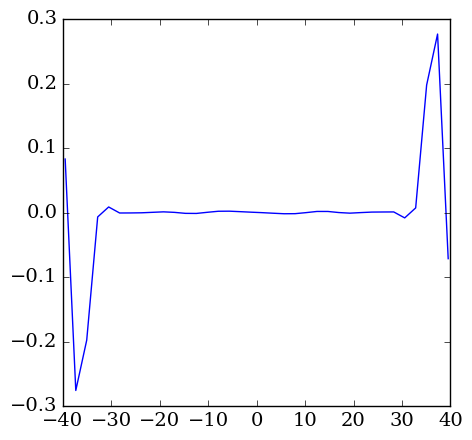

3.21406881602e-37 [  3.21107342e-37   5.75634368e-35]


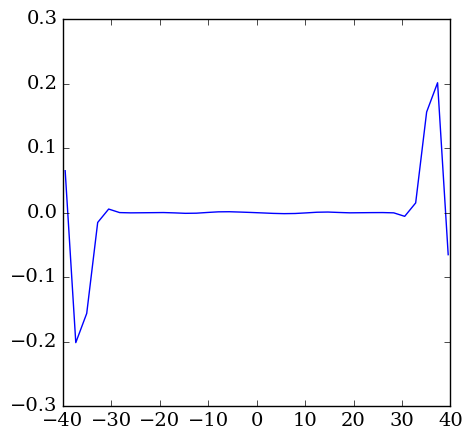

-6.55987768542e-40 [ -6.55237455e-40   4.53607051e-35]


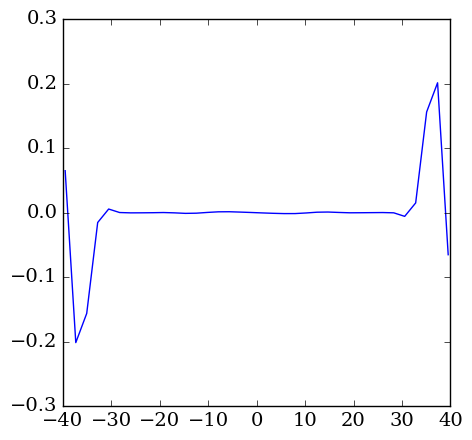

-1.66877355554e-39 [ -1.66718881e-39   4.53817314e-35]


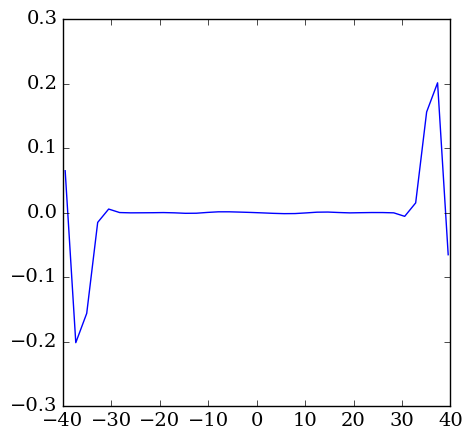

3.17877382655e-39 [  3.17578771e-39   4.53836115e-35]


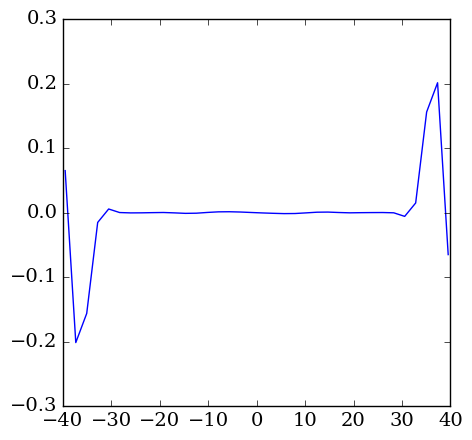

4.30233593775e-39 [  4.29834921e-39   4.53728337e-35]


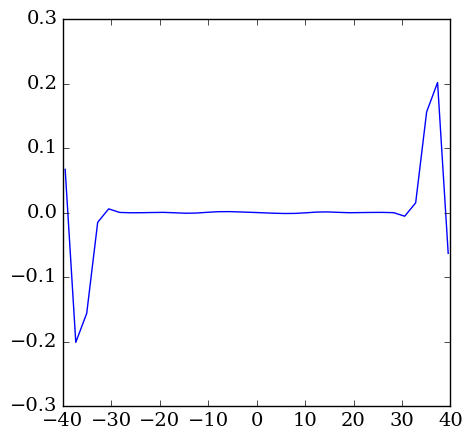

1.04983431146e-37 [  1.04885663e-37   4.53867838e-35]


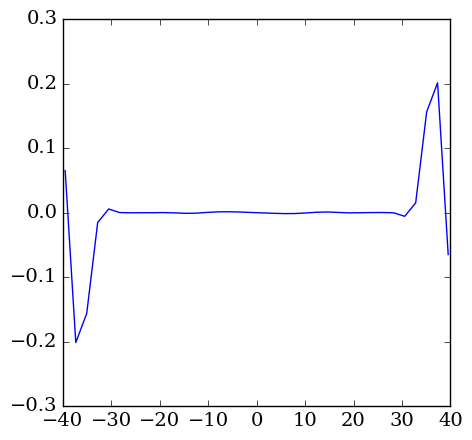

1.13899163664e-38 [  1.13791294e-38   4.53734606e-35]


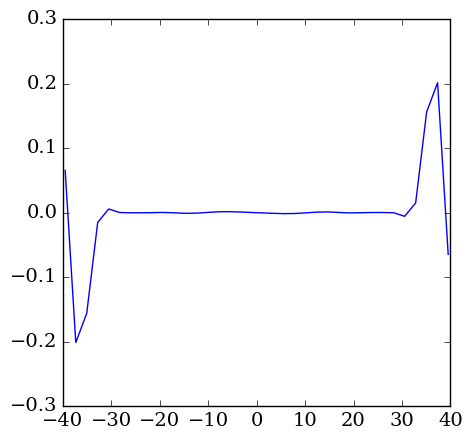

2.55773461738e-38 [  2.55537448e-38   4.53742493e-35]


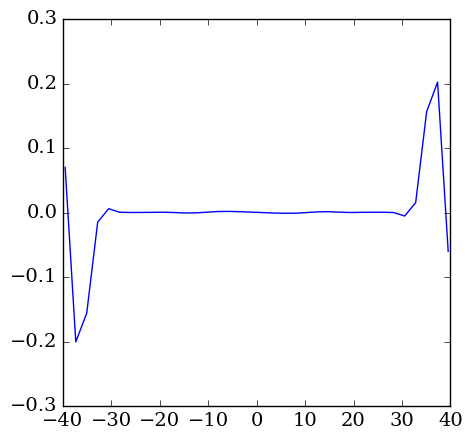

2.6349895015e-37 [  2.63253295e-37   4.53684456e-35]


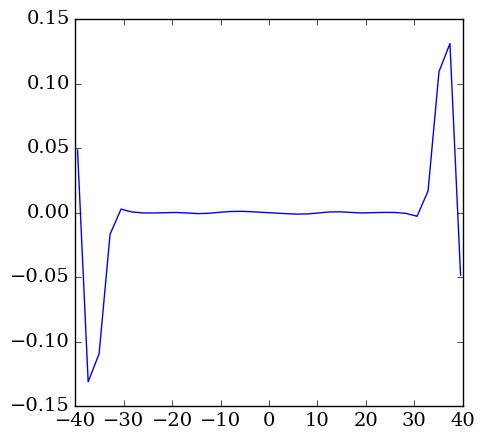

3.11556160771e-40 [  3.11483681e-40   3.20229920e-35]


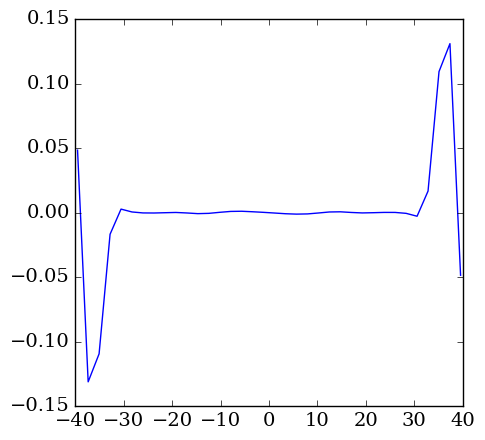

-3.30542838908e-40 [ -3.30076453e-40   3.20240479e-35]


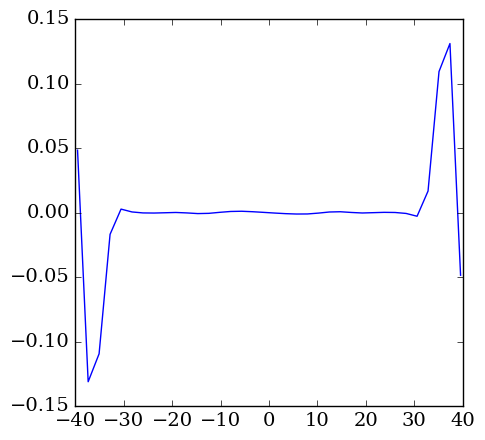

-9.32342576205e-40 [ -9.31513691e-40   3.20279986e-35]


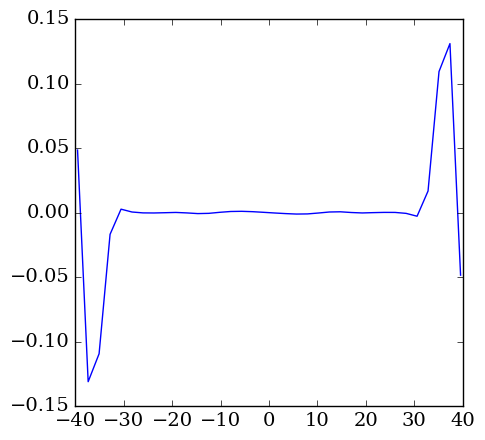

2.78157638471e-39 [  2.77886526e-39   3.20251889e-35]


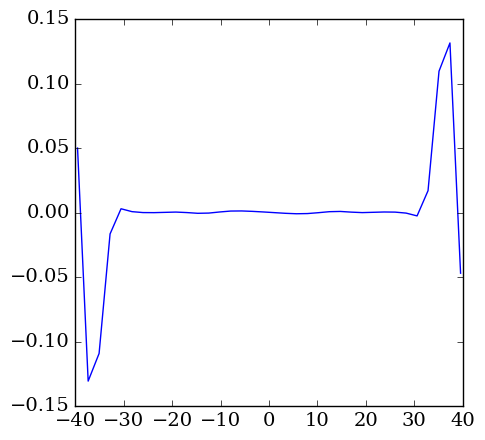

7.79109584937e-38 [  7.78381749e-38   3.20183151e-35]


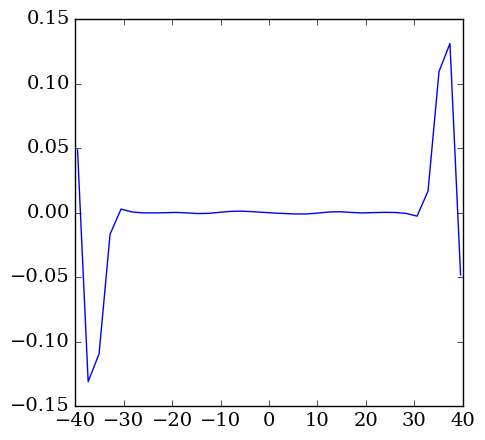

7.71816218705e-39 [  7.71093858e-39   3.20165158e-35]


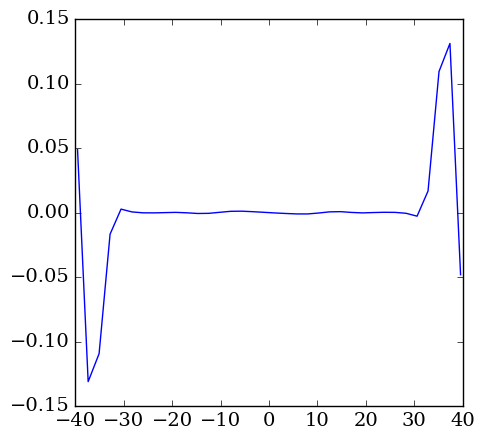

1.9581773251e-38 [  1.95633298e-38   3.20191279e-35]


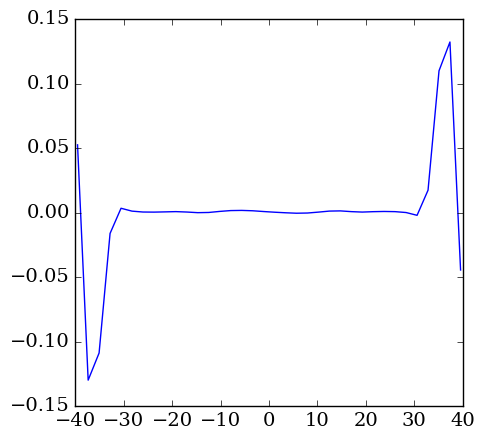

1.92739105735e-37 [  1.92559625e-37   3.20488849e-35]


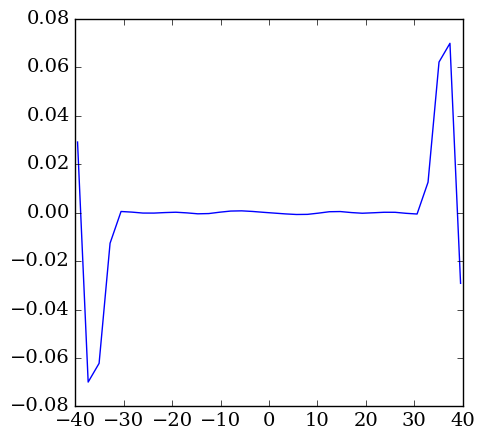

-6.33480706739e-40 [ -6.32842545e-40   1.85198275e-35]


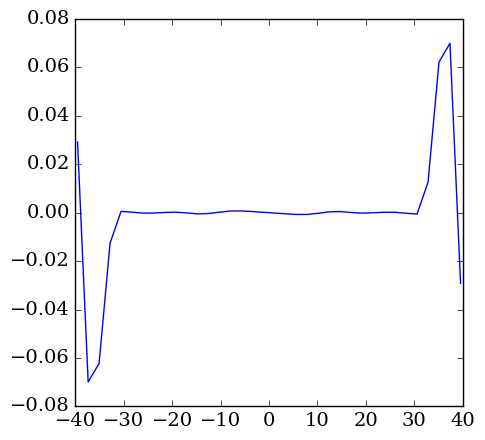

1.37598712541e-39 [  1.37470699e-39   1.85165176e-35]


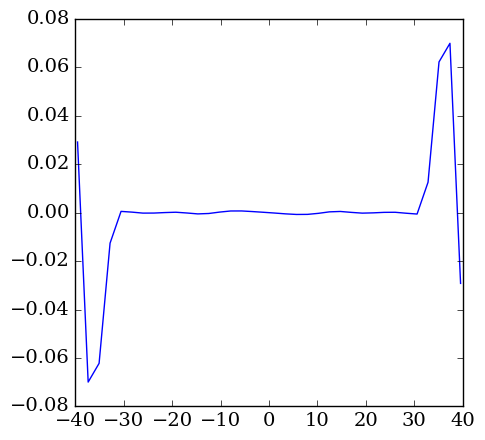

4.02882214329e-40 [  4.02509397e-40   1.85227677e-35]


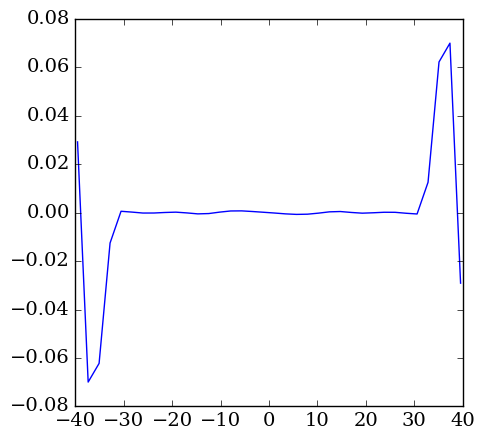

3.1470053084e-39 [  3.14405056e-39   1.85018360e-35]


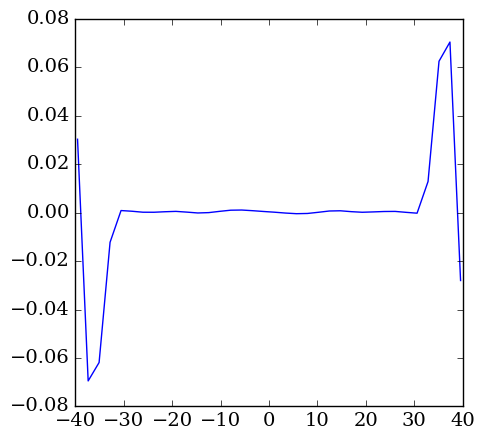

4.59453001026e-38 [  4.59025471e-38   1.85173369e-35]


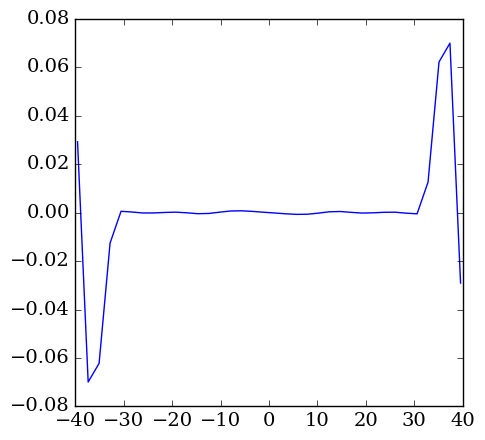

4.6273561417e-39 [  4.62298225e-39   1.85026904e-35]


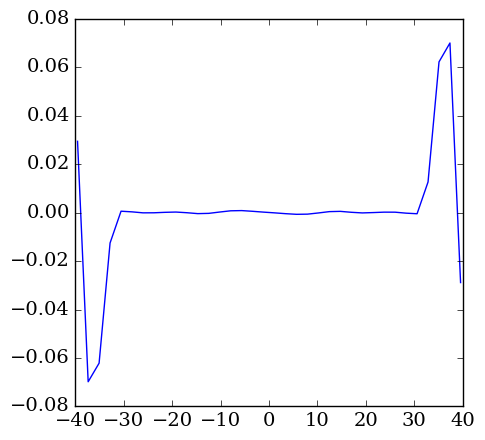

1.20339338804e-38 [  1.20226847e-38   1.84936300e-35]


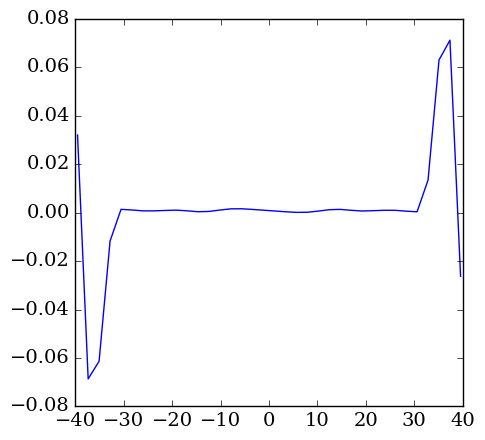

1.15277497211e-37 [  1.15170031e-37   1.85021623e-35]


In [55]:
efield=['0.00000001','0.0000001','0.000001','0.00001','0.0002','0.00002','0.00005','0.0005']
curvatures=[1,5,8,20,40,60,100,200]
thickness=[36]
nMol={'9':648,'12':864,'15':1080,'18':1296,'21':1512,'24':1728,'27':1944,'30':2160,'33':2376,'36':2592,'39':2808}
frames=100
KET=[[k,e,t] for k in curvatures for e in efield for t in thickness]

OutResult=[] #list of list i.e [[k,e,dipole],[...],[....]]

for info in KET:
    file="PtSlab111Z"+str(info[2])+"K_"+str(info[0])+"E_"+info[1]+".dump"
    try:
        rawData=feam.DumpExtractor("../KTuning/Simulation/"+file,frames,nMol[str(info[2])],0)
        [vx,vy,vz]=rawData["velocity"]
        [x,y,z]=rawData["position"]
        [c,w]=rawData["chargeQV"]
        [ex,ey,ez]=rawData["electricField"]
        [layer,a]=feam.Layers(z,nMol[str(info[2])])
    except:
        print("Error in reading "+"../KTuning/Simulation/"+file)
        continue
    eavz=[]
    eavx=[]
    eavy=[]
    chav=[]
    zav=[]
    begin=0
    for counter in range(len(a)):
        eavz.append(num.sum(num.sum(ez[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        chav.append(num.sum(num.sum(c[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavx.append(num.sum(num.sum(ex[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        eavy.append(num.sum(num.sum(ey[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
        zav.append(num.sum(num.sum(z[begin:,layer[counter][0]],axis=1)/len(layer[counter][0]))/(frames-begin))
    lab.plot(zav,eavz)
    lab.show()
    const0=num.polyfit(zav[8:-8],chav[8:-8],1)
    const1=num.polyfit(range(len(chav[8:-8])),chav[8:-8],1)
    const2=num.polyfit(range(len(zav[8:-8])),zav[8:-8],1)
    numberPerLayer=2*len(layer[8][0])
    dz=abs(zav[14]-zav[13])
    dipole=const1[0]*const2[0]/numberPerLayer
    dipole1=const0*dz*dz/numberPerLayer
    print(dipole*1.6e-19*1e-10,dipole1*1.6e-19*1e-10)
    OutResult.append([info[0],float(info[1])*1e-1*1e10,dipole*1.6e-19*1e-10])
OutResult=num.array(OutResult)
num.savetxt("../KTuning/Results/KED1.out",OutResult)
     
     
     
    